In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from src import Helpers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Summary from Wikipedia

In [2]:

# Read the text file into a DataFrame
summary_df = Helpers.load_data("plot_summaries.txt")

first_summary = summary_df.loc[0, 'Summary']
print(first_summary)
summary_df.head()

Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.


,Wiki_movie_id,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [3]:
# Calculate statistics on the length of each summary and add it to a new column
summary_df['Summary Length'] = summary_df['Summary'].apply(lambda x: len(x))

# Calculate summary statistics using the describe() method
print(summary_df['Summary Length'].describe())

summary_df.drop(columns=['Summary Length'], inplace=True)

count    42303.000000
mean      1784.034229
std       1808.925536
min         99.000000
25%        508.000000
50%       1079.000000
75%       2604.500000
max      28159.000000
Name: Summary Length, dtype: float64


### Movie Metadata

In [4]:
movie_df = Helpers.load_data("movie.metadata.tsv")
movie_df.head()


,Wiki_movie_id,Fb_movie_id,Movie name,release_date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,English,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,3196793,08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,28463795,0crgdbh,Brun bitter,1988.0,NaN,83.0,Norwegian,Norway,"Crime Fiction, Drama"
3,9363483,0285_cd,White Of The Eye,1987.0,NaN,110.0,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,261236,01mrr1,A Woman in Flames,1983.0,NaN,106.0,German,Germany,Drama


In [5]:
# Preprocess and tokenize genres
movie_df['Tokenized Genres'] = movie_df['Movie genres'].str.lower().str.replace('[^\w\s]', '').str.split()

# Preprocess and tokenize genres
movie_df['Tokenized Genres'] = movie_df['Movie genres'].str.lower().str.replace('[^\w\s]', '').str.split()

# Convert tokenized genres into TF-IDF features
tfidf = TfidfVectorizer()
tfidf_features = tfidf.fit_transform(movie_df['Tokenized Genres'].apply(' '.join))

# Apply K-Means clustering to group similar genres
kmeans = KMeans(n_clusters=5, random_state=42)
movie_df['Genre Category'] = kmeans.fit_predict(tfidf_features)

# Now, 'Genre Category' contains the category assignment for each genre


c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
from collections import Counter

# Create an empty dictionary to store genres for each cluster
cluster_top_genres = {}

# Iterate through each cluster
for cluster_id in range(kmeans.n_clusters):
    genres_in_cluster = movie_df.loc[movie_df['Genre Category'] == cluster_id, 'Movie genres'].str.split(', ')
    all_genres = [genre for genres in genres_in_cluster for genre in genres]
    genre_counts = Counter(all_genres)
    top_genres = genre_counts.most_common(5)
    top_genres_str = ', '.join([genre for genre, count in top_genres])
    cluster_top_genres[f'Cluster {cluster_id}'] = top_genres_str

# Print the top 5 genres for each cluster
for cluster_id, top_genres in cluster_top_genres.items():
    print(f'{cluster_id} Top Genres: {top_genres}')

Cluster 0 Top Genres: Comedy, Romance Film, Drama, Comedy film, Romantic comedy
Cluster 1 Top Genres: Drama, Romantic drama, Romance Film, Family Drama, Political drama
Cluster 2 Top Genres: Black-and-white, Silent film, Drama, Short Film, Comedy
Cluster 3 Top Genres: Documentary, Short Film, Music, Indie, Biography
Cluster 4 Top Genres: Drama, Thriller, Action, Crime Fiction, World cinema


In [7]:
movie_df

,Wiki_movie_id,Fb_movie_id,Movie name,release_date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Tokenized Genres,Genre Category
0,975900,03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,English,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...","[thriller,, science, fiction,, horror,, advent...",4
1,3196793,08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama","[mystery,, biographical, film,, drama,, crime,...",4
2,28463795,0crgdbh,Brun bitter,1988.0,NaN,83.0,Norwegian,Norway,"Crime Fiction, Drama","[crime, fiction,, drama]",4
3,9363483,0285_cd,White Of The Eye,1987.0,NaN,110.0,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller","[thriller,, erotic, thriller,, psychological, ...",4
4,261236,01mrr1,A Woman in Flames,1983.0,NaN,106.0,German,Germany,Drama,[drama],1
...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,0j7hxnt,Mermaids: The Body Found,2011.0,NaN,120.0,English,United States of America,Drama,[drama],1
81737,34980460,0g4pl34,Knuckle,2011.0,NaN,96.0,English,"Ireland, United Kingdom","Biographical film, Drama, Documentary","[biographical, film,, drama,, documentary]",3
81738,9971909,02pygw1,Another Nice Mess,1972.0,NaN,66.0,English,United States of America,"Satire, Comedy","[satire,, comedy]",0
81739,913762,03pcrp,The Super Dimension Fortress Macross II: Lover...,1992.0,NaN,150.0,Japanese,Japan,"Science Fiction, Japanese Movies, Adventure, A...","[science, fiction,, japanese, movies,, adventu...",4


In [8]:
movie_df['Movie box office revenue'].isna().mean()

0.8972241592346558

In [9]:
r = movie_df[movie_df['Movie countries']=='Russia']
# Extract the year from 'release_date'
r['year'] = r['release_date']

C:\Users\erwan\AppData\Local\Temp\ipykernel_16156\2844673546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['year'] = r['release_date']


In [10]:
# Split the 'Movie genres' column by commas and create a list of genres
genres_list = movie_df['Movie genres'].str.split(', ').explode()

# Get unique genres
unique_genres = genres_list.unique()

# Print all unique genres
for genre in unique_genres:
    print(genre)

# Filter and get all genres that contain the word "war"
#war_genres = movie_df[movie_df['Movie genres'].str.contains('war', case=False, na=False)]['Movie genres']



Thriller
Science Fiction
Horror
Adventure
Supernatural
Action
Space western
Mystery
Biographical film
Drama
Crime Drama
Crime Fiction
Erotic thriller
Psychological thriller
Short Film
Silent film
Indie
Black-and-white
Comedy
Family Film
Fantasy
World cinema
Musical
Japanese Movies
Action/Adventure
Romantic comedy
Ensemble Film
Comedy-drama
Romantic drama
Romance Film
Costume drama
War film
Epic
Period piece
Film adaptation
Animation
Children's/Family
Children's Fantasy

Future noir
Comedy film
Coming of age
Suspense
Crime Thriller
Black comedy
Bollywood
Marriage Drama
Wuxia
Martial Arts Film
Chinese Movies
Western
Parody
Mockumentary
Fan film
Cult
Adventure Comedy
Slapstick
Biopic [feature]
Historical Epic
Sports
Family Drama
Political drama
Historical fiction
Courtroom Drama
Culture & Society
Biography
Documentary
Christmas movie
Television movie
Malayalam Cinema
Historical drama
Action Comedy
Blaxploitation
Erotica
Sci-Fi Horror
Satire
Epic Western
Gangster Film
Softcore Porn
Sexploi

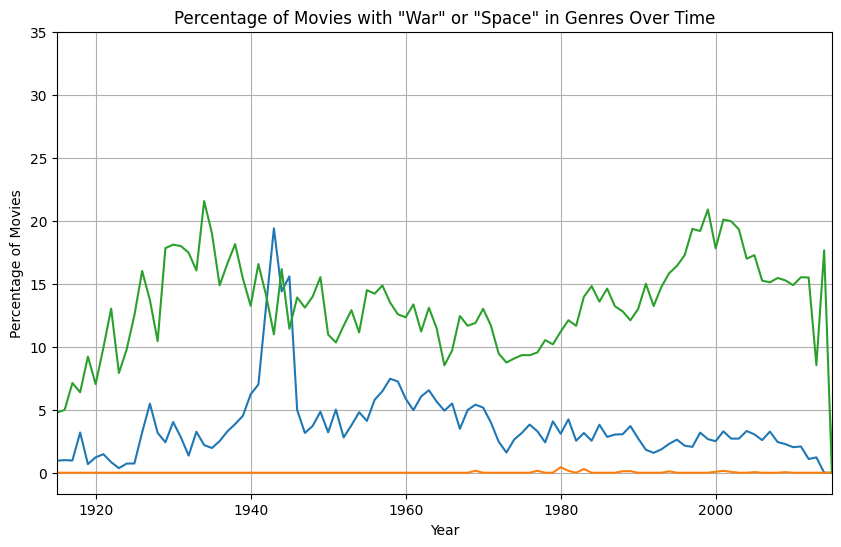

In [11]:
# Extract the year from 'release_date'
movie_df['year'] = movie_df['release_date']

# Create a binary column indicating if genres contain "war"
movie_df['contains_war'] = movie_df['Movie genres'].str.contains('war', case=False, na=False)
movie_df['contains_space'] = movie_df['Movie genres'].str.contains('space', case=False, na=False)
movie_df['contains_love'] = movie_df['Movie genres'].str.contains('Rom', case=False, na=False)

# Group by year and calculate the percentage of movies with genres containing "war"
percentage_contains_space = movie_df.groupby('year')['contains_space'].mean() * 100
percentage_contains_war =  movie_df.groupby('year')['contains_war'].mean() * 100

percentage_contains_love = movie_df.groupby('year')['contains_love'].mean() * 100


# Plot the evolution of the percentage
plt.figure(figsize=(10, 6))
percentage_contains_war.plot(kind='line')
percentage_contains_space.plot(kind='line')
percentage_contains_love.plot(kind='line')
plt.xlim([1915,2015])
plt.title('Percentage of Movies with "War" or "Space" in Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Movies')
plt.grid(True)
plt.show()

# Drop the 'contains_war' column
movie_df = movie_df.drop(columns=['contains_war'])
movie_df = movie_df.drop(columns=['contains_space'])
movie_df = movie_df.drop(columns=['contains_love'])

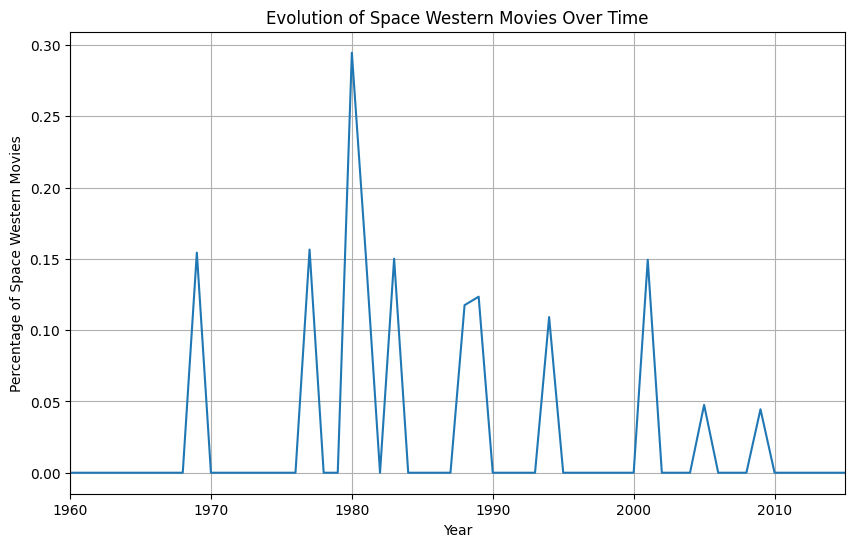

In [12]:
# Convert 'release_date' to datetime type
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'], format='%Y', errors='coerce')

# Extract the year from 'release_date'
movie_df['year'] = movie_df['release_date'].dt.year

# Create a binary column indicating 'space western' genre
movie_df['is_space_western'] = movie_df['Movie genres'].str.contains('space western', case=False, na=False)

# Group by year and calculate the percentage of movies with 'space western'
percentage_space_western = movie_df.groupby('year')['is_space_western'].mean() * 100

# Plot the evolution of the percentage
plt.figure(figsize=(10, 6))
plt.xlim([1960,2015])
percentage_space_western.plot(kind='line')
plt.title('Evolution of Space Western Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Space Western Movies')
plt.grid(True)
plt.show()

<Axes: >

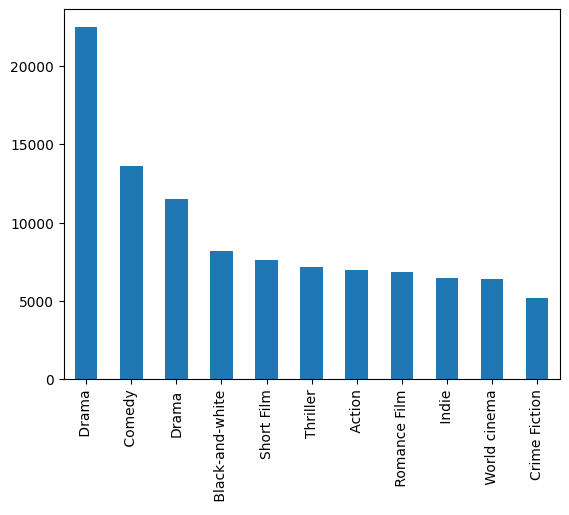

In [13]:
movie_genres = movie_df['Movie genres'].str.get_dummies(sep=',').sum().sort_values(ascending=False)
movie_genres.loc[movie_genres.values>=5000].plot(kind='bar')

### Character data

In [14]:
character_df = Helpers.load_data("character.metadata.tsv")

character_df.head()

,Wiki_movie_id,Fb_movie_id,release_date,Character,Actor date of birth,Actor gender,Actor_height,Fb_actor_ethnicity_id,Actor_name,Actor_age,Freebase character/actor map ID,Fb_char_id,Fb_actor_id
0,975900,03vyhn,2001.0,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,0bgchxw,0bgcj3x,03wcfv7
1,975900,03vyhn,2001.0,Lieutenant Melanie Ballard,1974-08-15,F,1.780,044038p,Natasha Henstridge,27.0,0jys3m,0bgchn4,0346l4
2,975900,03vyhn,2001.0,Desolation Williams,1969-06-15,M,1.727,0x67,Ice Cube,32.0,0jys3g,0bgchn_,01vw26l
3,975900,03vyhn,2001.0,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,02vchl6,0bgchnq,034hyc
4,975900,03vyhn,2001.0,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,02vbb3r,0bgchp9,01y9xg


In [38]:
# Sort the DataFrame by 'Fb_actor_id', 'Actor_age', and 'Character'
character_df = character_df.sort_values(['Fb_actor_id', 'Actor_age', 'Character'])

# Create a mask to identify the major roles (Character is not NaN)
major_role_mask = character_df['Character'].notna()

# Calculate the i-th film for each actor based on major roles
character_df['Film_Index'] = (major_role_mask.groupby(character_df['Fb_actor_id']).cumsum()
                    .where(major_role_mask, np.nan))  # Set 0 for minor roles
stat = character_df[character_df['Actor_name']== "Johnny Depp"]
stat.head()


,Wiki_movie_id,Fb_movie_id,release_date,Character,Actor date of birth,Actor gender,Actor_height,Fb_actor_ethnicity_id,Actor_name,Actor_age,Freebase character/actor map ID,Fb_char_id,Fb_actor_id,Film_Index
120977,3028191,08ll52,1984.0,Glen Lantz,1963-06-09,M,1.78,01qhm_,Johnny Depp,21.0,0jsvh6,0csqbm,0jfx1,1.0
351263,3514297,09hq9g,1985.0,Jack,1963-06-09,M,1.78,01qhm_,Johnny Depp,21.0,03lfl4k,04fll8n,0jfx1,2.0
22381,19315787,04lgx5r,1986.0,Donnie Fleischer,1963-06-09,M,1.78,01qhm_,Johnny Depp,23.0,04q4cj_,0gxq38m,0jfx1,3.0
229949,113460,0sxmx,1986.0,Gator Lerner,1963-06-09,M,1.78,01qhm_,Johnny Depp,23.0,0k1yz8,02nwky0,0jfx1,4.0
441458,6614818,0gdv4x,1989.0,NaN,1963-06-09,M,1.78,01qhm_,Johnny Depp,25.0,0h9hhm2,NaN,0jfx1,NaN


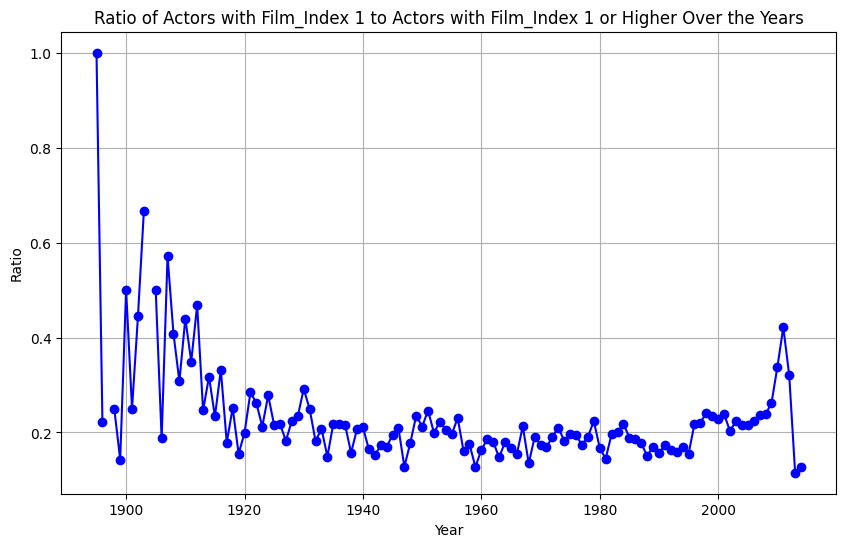

In [44]:
# Filter major roles (Character is not NaN)
major_roles = character_df[character_df['Character'] != 'NaN']

# Group by release date and calculate the number of actors with Film_Index equal to 1 or higher
actors_by_year = major_roles.groupby('release_date')['Fb_actor_id'].nunique()

# Group by release date and calculate the number of actors with Film_Index equal to 1
actors_with_index_1_by_year = major_roles[major_roles['Film_Index'] == 1].groupby('release_date')['Fb_actor_id'].nunique()

# Calculate the ratio of actors with Film_Index 1 to actors with Film_Index 1 or higher for each year
ratio = actors_with_index_1_by_year / actors_by_year

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ratio.index, ratio, marker='o', linestyle='-', color='b')
plt.title('Ratio of Actors with Film_Index 1 to Actors with Film_Index 1 or Higher Over the Years')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()

c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='Actor_age', ylabel='Count'>

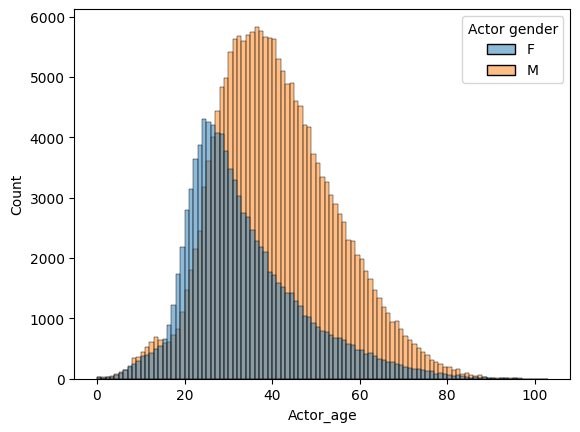

In [15]:
n_bins=int(character_df['Actor_age'].max()-character_df['Actor_age'].min()+1)
sns.histplot(data=character_df,x='Actor_age',hue='Actor gender',binwidth=1)

c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='release_date', ylabel='Count'>

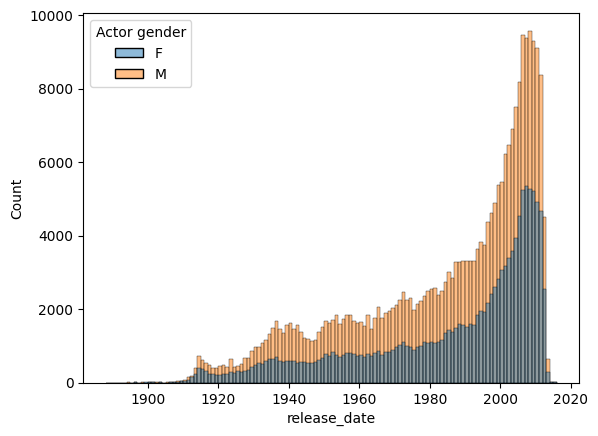

In [16]:
n_bins=int(character_df['release_date'].max()-character_df['release_date'].min()+1)
sns.histplot(data=character_df,x='release_date',hue='Actor gender',binwidth=1)

c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

(1.4, 2.1)

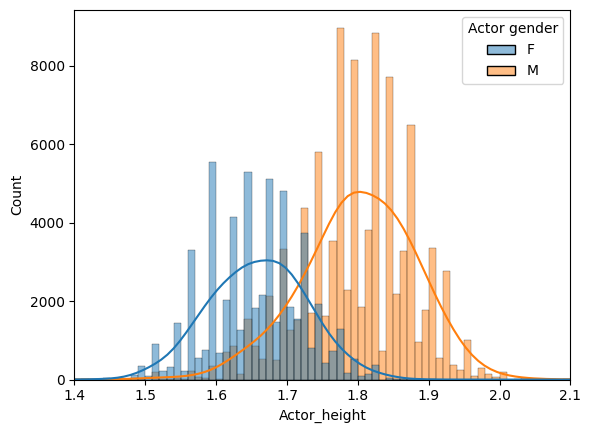

In [17]:
sns.histplot(data=character_df,x='Actor_height',hue='Actor gender',binwidth=0.01,kde=True,kde_kws={'bw_adjust':3})
plt.xlim([1.4,2.1])

In [18]:
# Read the text file into a DataFrame
char_cluster_df = Helpers.load_data("name.clusters.txt")

char_cluster_df.head()

,Name,Fb_char_actor_id
0,Stuart Little,0k3w9c
1,Stuart Little,0k3wcx
2,Stuart Little,0k3wbn
3,John Doe,0jyg35
4,John Doe,0k2_zn


In [19]:
# Read the text file into a DataFrame
tvtropes_df = Helpers.load_data("tvtropes.clusters.txt")

tvtropes_df.head()

,CharType,Char,Movie,Fb_char_actor_id,Actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,0k3rhh,James Spader
